In [1]:
import numpy as np
import yfinance as yf

df  = yf.download("MSFT", start='2010-01-01', end='2023-01-09')

df.reset_index(drop=True, inplace=True)

df.head()

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,30.850000,31.100000,30.639999,30.959999,23.690718,49749600
2,30.879999,31.080000,30.520000,30.770000,23.545330,58182400
3,30.629999,30.700001,30.190001,30.450001,23.300467,50559700
4,30.280001,30.879999,30.240000,30.660000,23.461161,51197400
...,...,...,...,...,...,...
3271,238.210007,239.960007,236.660004,239.820007,239.820007,21930800
3272,243.080002,245.750000,237.399994,239.580002,239.580002,25740000
3273,232.279999,232.869995,225.960007,229.100006,229.100006,50623400
3274,227.199997,227.550003,221.759995,222.309998,222.309998,39585600


In [2]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [3]:
df = df.astype('float64')

In [4]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 1600x800 with 0 Axes>

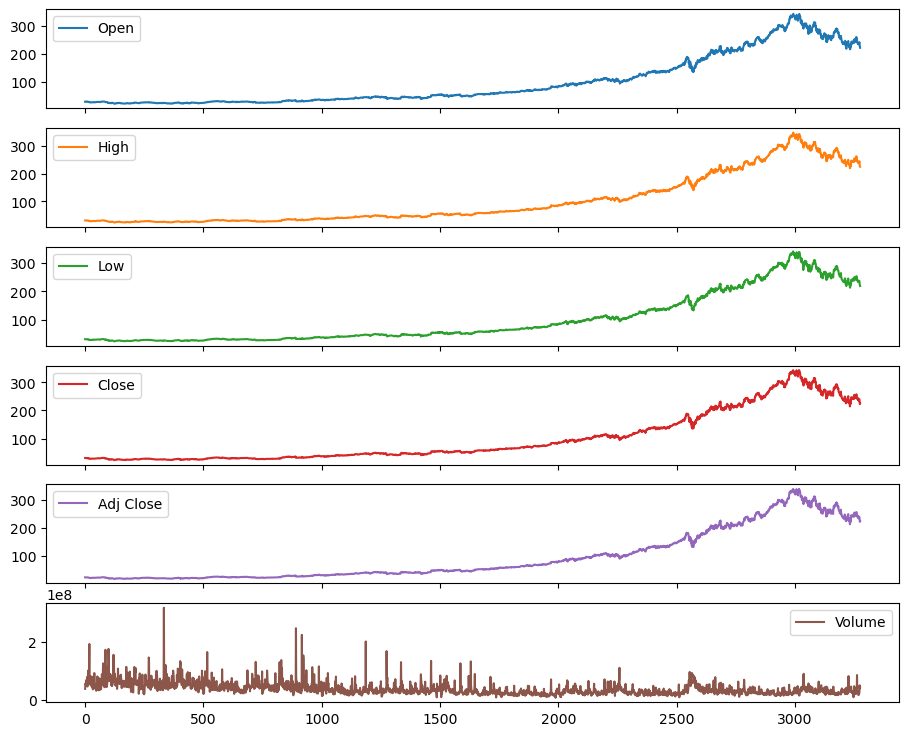

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8)) # resizing the plot
axes = df.plot(figsize=(11, 9), subplots = True)
plt.show();

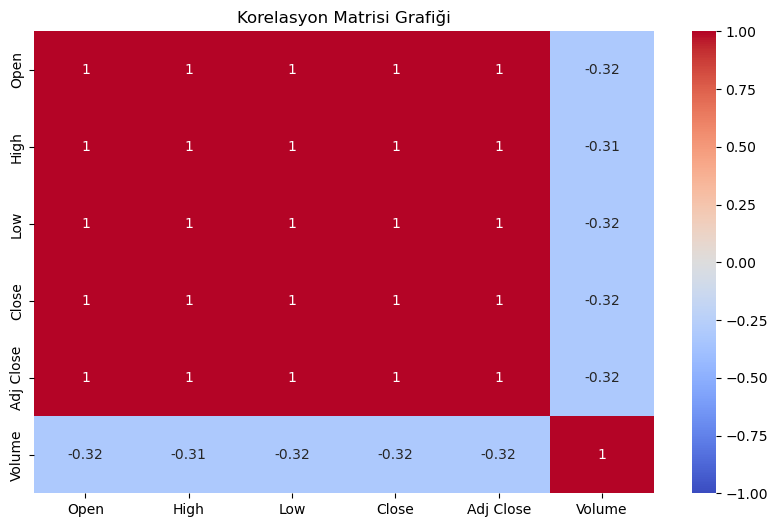

In [6]:
corr = df.corr()
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 6))
 
sns.heatmap(ax = ax, \
            data = corr, \
            annot = True, \
            cmap = "coolwarm", \
            vmin = -1, vmax= 1, center = 0)
 
ax.set_title("Korelasyon Matrisi Grafiği")
 
plt.show()

In [7]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [10]:
from sklearn.svm import SVR
clf = SVR(kernel='rbf')
clf = clf.fit(X_train, y_train)

In [11]:
y_test = y_test.sort_index()

len(y_test)

656

In [12]:
X_test = X_test.sort_index()

len(X_test)

656

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

82.32251917602548

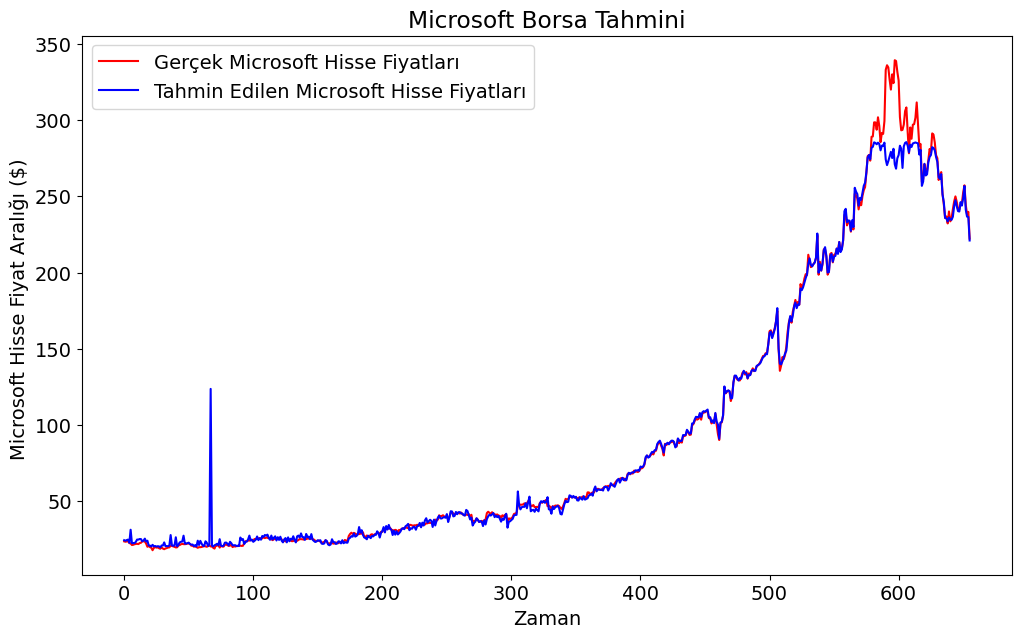

In [16]:
predicted_stock_price = y_pred 
actual_stock_price = y_test

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

plt.plot(np.arange(656),actual_stock_price, color="red", label="Gerçek Microsoft Hisse Fiyatları")
plt.plot(np.arange(656),predicted_stock_price, color="blue", label="Tahmin Edilen Microsoft Hisse Fiyatları")
plt.title("Microsoft Borsa Tahmini")
plt.xlabel("Zaman")
plt.ylabel("Microsoft Hisse Fiyat Aralığı ($) ")

plt.legend();
